In [1]:
# import important libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the transaction dataset
df_retail = pd.read_csv('wrangled_transactions.csv')
df_retail.head()

,customer_id,revenue_2019,customer_relation_days,last_purchase_days,number_of_purchases,avg_order_cost,revenue_2020
0,12747.0,706.27,26,18,2,353.135000,3489.74
1,12748.0,4228.13,30,8,14,302.009286,29491.60
2,12826.0,155.00,22,22,1,155.000000,1319.72
3,12829.0,85.75,17,17,1,85.750000,207.25
4,12838.0,390.79,30,30,1,390.790000,292.34


In [3]:
# understand the numeric columns
print(df_retail.shape)
df_retail.describe()

(708, 7)


,customer_id,revenue_2019,customer_relation_days,last_purchase_days,number_of_purchases,avg_order_cost,revenue_2020
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,15653.316384,654.627811,22.655367,19.980226,1.405367,420.118001,4407.683206
std,1593.880573,1548.219356,5.453664,5.812940,0.938460,657.895532,13824.121791
min,12747.000000,16.210000,8.000000,8.000000,1.000000,16.210000,10.000000
25%,14341.500000,212.400000,18.000000,15.000000,1.000000,185.912500,570.637500
50%,15701.000000,342.580000,23.000000,19.000000,1.000000,302.440000,1583.085000
75%,17078.250000,606.837500,26.500000,24.000000,2.000000,421.255000,3573.257500
max,18260.000000,27834.610000,30.000000,30.000000,14.000000,13917.305000,231822.690000


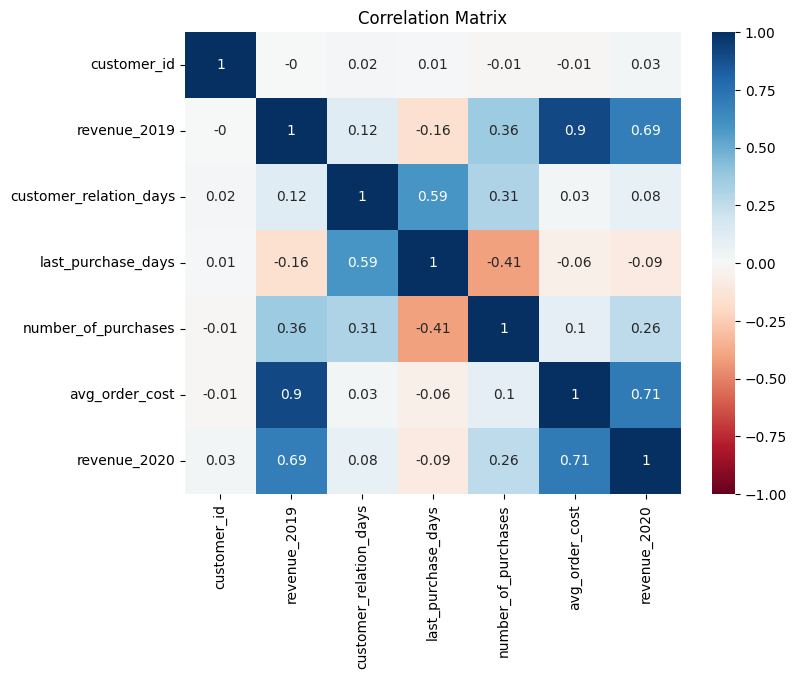

In [4]:
# correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
s = sns.heatmap(df_retail.corr().round(2),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Correlation Matrix')
plt.show()

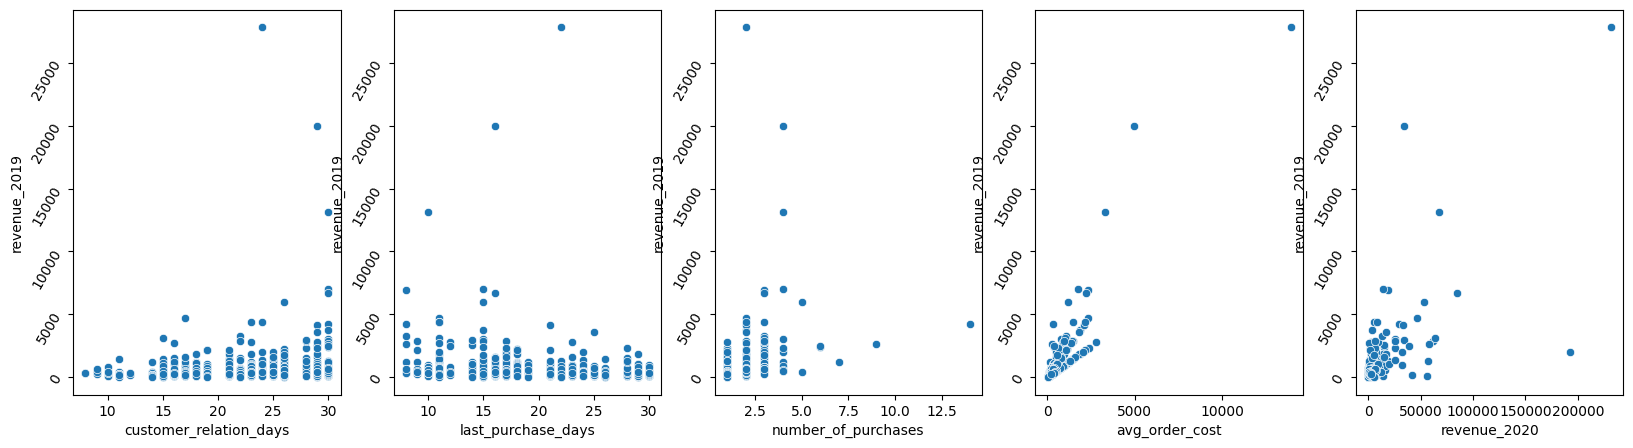

In [5]:
# understand the relation between revenue_2019 and other columns
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(['customer_relation_days', 'last_purchase_days', 'number_of_purchases', 'avg_order_cost', 'revenue_2020']):
    ax[i].tick_params(axis='y', rotation=60)
    sns.scatterplot(data=df_retail, x=col, y='revenue_2019', ax=ax[i])
plt.show()

# Model Building

In [6]:
X = df_retail[['revenue_2019', 'customer_relation_days', 'last_purchase_days', 'number_of_purchases', 'avg_order_cost']]
y = df_retail['revenue_2020']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [7]:
# build the linear regression model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# coefficients
model.coef_

array([-1.07823552e+00, -9.50680681e+01,  2.11229946e+02,  3.83052255e+03,
        1.69250468e+01])

# Evaluation 1

In [9]:
# predict single customer revenue 2020
single_customer = pd.DataFrame({
    'revenue_2019': [5000],
    'customer_relation_days': [200],
    'last_purchase_days': [10],
    'number_of_purchases': [20],
    'avg_order_cost': [1]
})

model.predict(single_customer)

array([45017.79104095])

## Evaluation 2.1

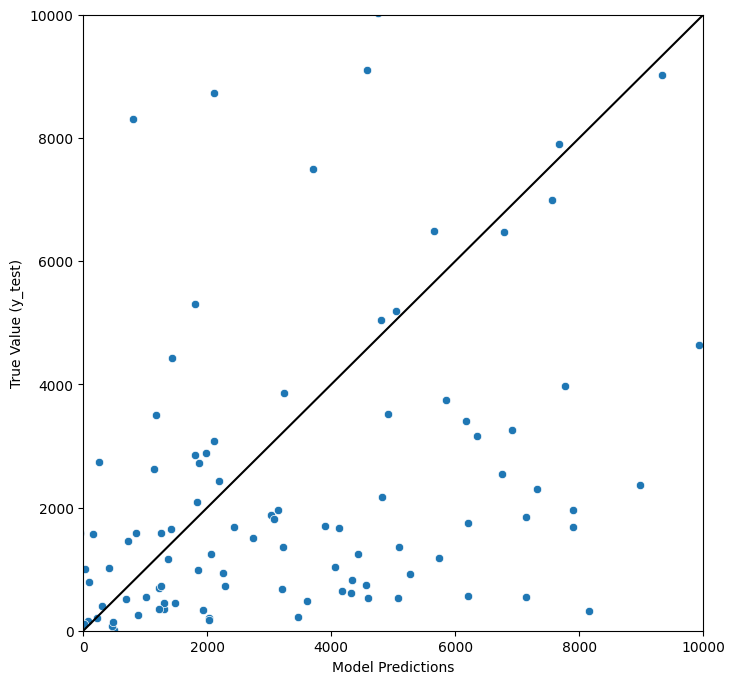

In [10]:
# plot predictions against the actual value
plt.figure(figsize=(8, 8))
sns.scatterplot(x=model.predict(X_test), y=y_test, )
# scale the diagram to 0-10000
plt.xlim(0,10000)
plt.ylim(0,10000)
# plot the diagonal perfect prediction line
plt.plot([0, 10000], [0, 10000], 'k-')

plt.xlabel('Model Predictions')
plt.ylabel('True Value (y_test)')
plt.show()

## Evaluation 2.2

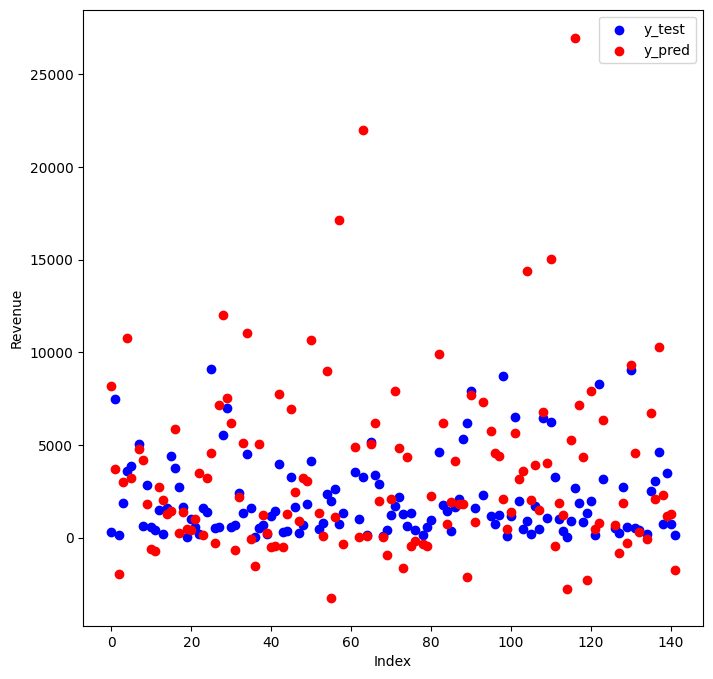

In [11]:
# predict
y_pred = model.predict(X_test)

# prepare a dataframe with actual value and prediction
predictions = pd.DataFrame({'y_test': y_test.array, 'y_pred': y_pred})
predictions = predictions[predictions['y_test'] < 10000]

# plot predictions against the actual value
plt.figure(figsize=(8, 8))
plt.scatter(predictions.index, predictions['y_test'], color='blue')
plt.scatter(predictions.index, predictions['y_pred'], color='red')
plt.legend(['y_test', 'y_pred'])
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()

In [12]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.67411707],
       [0.67411707, 1.        ]])

## Evaluation 3

In [13]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, model.predict(X_test)))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, model.predict(X_test), squared=False))

Mean squared error: 39706724.87
Root mean squared error: 6301.33


/Users/asishbiswas/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Model with positively correlated features

Mean squared error: 26412866.58
Root mean squared error: 5139.34


/Users/asishbiswas/miniconda3/envs/ai/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


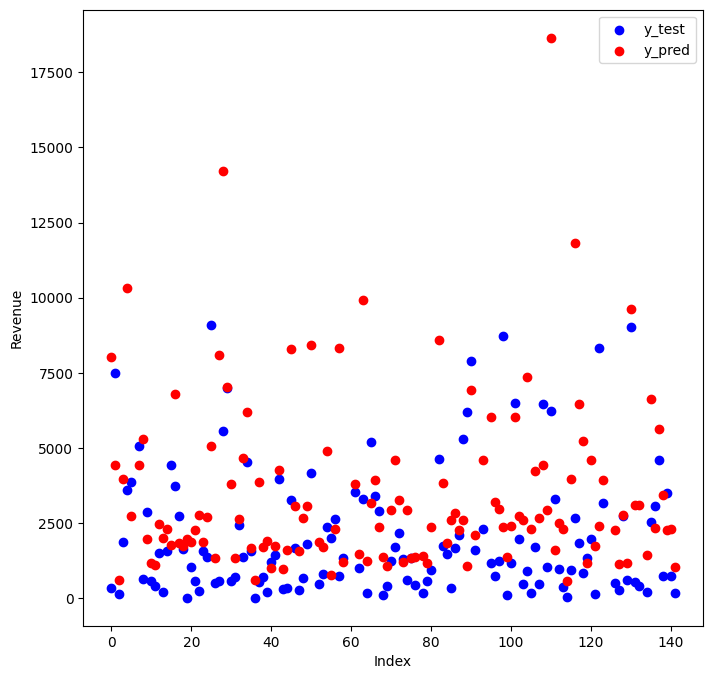

In [14]:
# X = df_retail[['revenue_2019', 'customer_relation_days', 'last_purchase_days', 'number_of_purchases', 'avg_order_cost']]
X = df_retail[['revenue_2019', 'number_of_purchases']]
y = df_retail['revenue_2020']

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# build the linear regression model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

# prepare a dataframe with actual value and prediction
predictions = pd.DataFrame({'y_test': y_test.array, 'y_pred': y_pred})
predictions = predictions[predictions['y_test'] < 10000]

# plot predictions against the actual value
plt.figure(figsize=(8, 8))
plt.scatter(predictions.index, predictions['y_test'], color='blue')
plt.scatter(predictions.index, predictions['y_pred'], color='red')
plt.legend(['y_test', 'y_pred'])
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()